# Business Case: Yulu - Hypothesis Testing

Task:
* Finding  which variables are significant in predicting the demand for shared electric cycles in the Indian market.
* Analysing how well those variables describe the electric cycle demands.
* Performing various hypothesis test such as 2 sample t test, ANNOVA, Chi-Square test.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df=pd.read_csv('bike_sharing.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df['Date']=pd.to_datetime(df['datetime']).dt.date

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  Date        10886 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


In [7]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

season: season (1: spring, 2: summer, 3: fall, 4: winter)

In [8]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [9]:
df['month']=pd.to_datetime(df['Date']).dt.month

In [10]:
df['year']=pd.to_datetime(df['Date']).dt.year

In [11]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Date,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,2011


C:\Users\sudhanshu tomar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

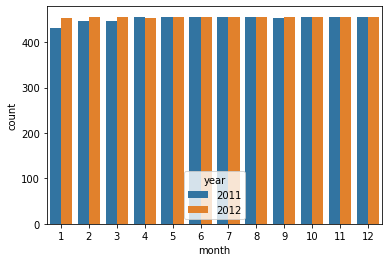

In [12]:
sns.countplot(df['month'],hue=df['year'])

In [13]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

C:\Users\sudhanshu tomar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather', ylabel='count'>

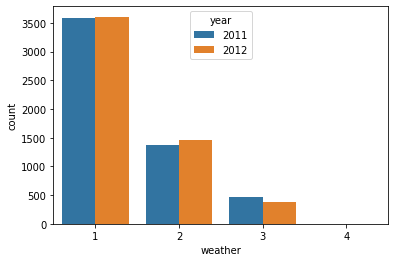

In [14]:
sns.countplot(df['weather'], hue = df['year'])

weather: 1: Clear, Few clouds, partly cloudy, partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

<AxesSubplot:>

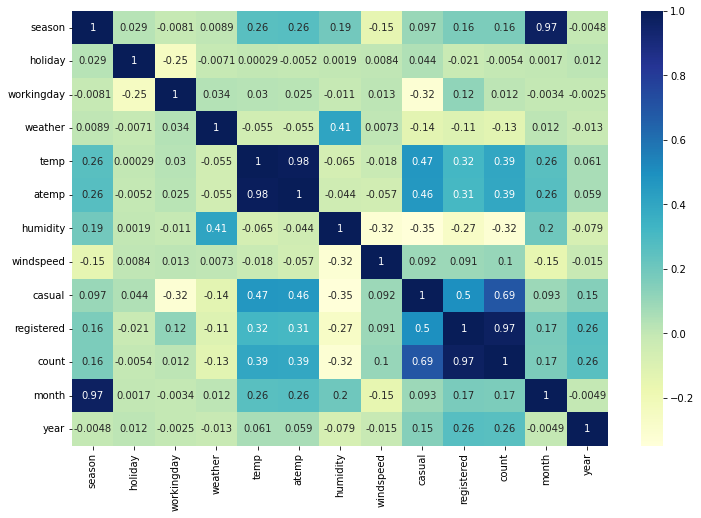

In [15]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), cmap= "YlGnBu", annot=True)

* There is a positive corelation between counts and temperature.
* There is a negative corelation between counts and humidity.

([<matplotlib.patches.Wedge at 0x26a08afbf70>,
 [Text(-0.6067654144600506, 0.9175160662435963, 'working day counts'),
  Text(0.6067653285559936, -0.9175161230530706, 'non-working day counts')])

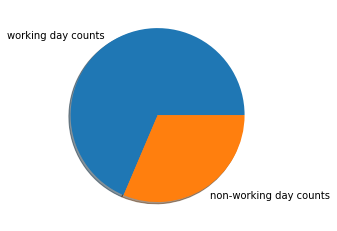

In [16]:
plt.pie([df.loc[df['workingday']==1]['count'].sum(),df.loc[df['workingday']==0]['count'].sum()],
       labels=['working day counts','non-working day counts'],
        shadow=True
       )

In [17]:
a=df['workingday'].value_counts()

# 2 sample t test

Perfoming 2 sample t test on working day and non working day counts.

Taking significant level(alpha) as 0.05 for all test.

considreing:
Null hypothesis Ho = mean of count of bike on non working day is equal to mean of counts of bike on working day.

Alternate hypothesis Hn = mean of count of bike on non working day is not equal to mean of counts of bike on working day.

<AxesSubplot:ylabel='Density'>

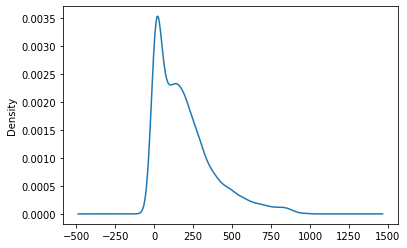

In [18]:
df.loc[df['workingday']==1]['count'].plot(kind='kde')

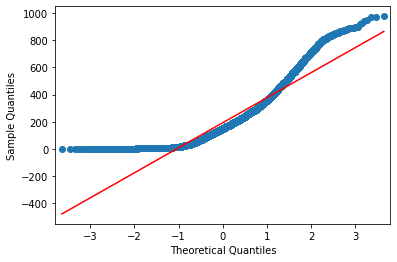

In [19]:
x=df.loc[df['workingday']==1]['count']
sm.qqplot(x, dist=stats.norm, line='s');

The distribution does not follows normal distribution

In [3]:
df1=df.loc[df['workingday']==1]['count'].reset_index()

In [21]:
df1.drop(['index'], axis=1, inplace=True)


In [5]:
df2=df.loc[df['workingday']==0]['count'].reset_index()

In [23]:
df2.drop(['index'], axis=1, inplace=True)

In [24]:
from scipy.stats import ttest_ind

In [25]:
ttest,p_value=ttest_ind(df1,df2)

In [26]:
print(p_value)

[0.22644804]


Since the P value is greater than 0.05 hence null hypotheis has failed to reject.

So we can say that non non working day has no effect on counts of bike.

# Annova test

Performing annova test to check if seasons and weather have any effect on counts.


 Test 1: for seasons

Considreing: Null hypothesis Ho = Average counts of bike is same in all seasons.

Alternate hypothesis Hn = Average counts of bike is not same in all seasons.

<AxesSubplot:title={'center':'count'}, xlabel='season'>

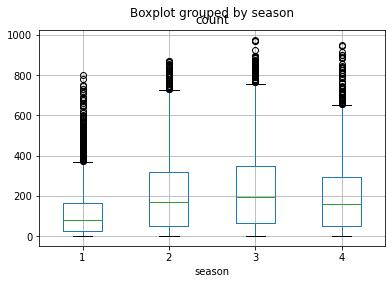

In [27]:
df.boxplot('count', by='season')

In [59]:
from scipy.stats import f_oneway

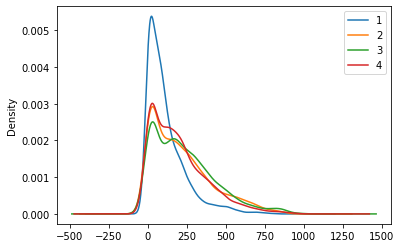

In [29]:
df.groupby('season')['count'].plot(kind='kde')
plt.legend()

Above plot suggest that all samples are form same population.

In [30]:
a = df.loc[df['season'] == 1]['count'].values
b = df.loc[df['season'] == 2]['count'].values
c = df.loc[df['season'] == 3]['count'].values
d = df.loc[df['season'] == 4]['count'].values
f_oneway(a, b, c, d)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

Since the P-value is very less than 0.05 we can reject the null hypothesis and hence it is concluded that average counts in diffrent seasons are diffrent.



Test 2: for seasons

considreing: Null hypothesis Ho = Average counts of bike is same in all weather.

Alternate hypothesis Hn = Average counts of bike is not same in all weather.

<AxesSubplot:title={'center':'count'}, xlabel='weather'>

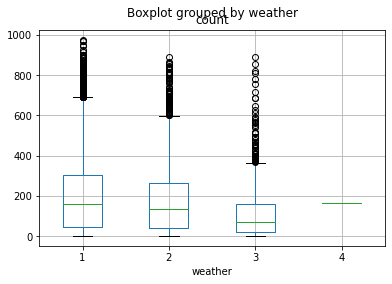

In [31]:
df.boxplot('count', by='weather')

In [32]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Since we have only one entry for weather 4 so better to drop it for annova test on weather.

In [33]:
a=df.loc[df['weather']==4]
df.drop(a.index, axis=0, inplace=True)

In [34]:
df['weather'].value_counts()

1    7192
2    2834
3     859
Name: weather, dtype: int64

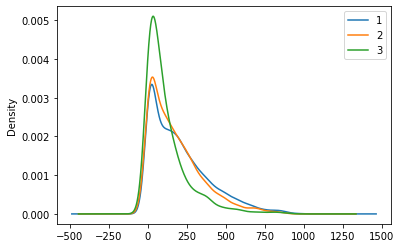

In [35]:
df.groupby('weather')['count'].plot(kind='kde')
plt.legend()

Above plot suggest that all samples are form same population.

In [36]:
a = df.loc[df['weather'] == 1]['count'].values
b = df.loc[df['weather'] == 2]['count'].values
c = df.loc[df['weather'] == 3]['count'].values

f_oneway(a, b, c)

F_onewayResult(statistic=98.28356881946706, pvalue=4.976448509904196e-43)

Since the P-value is very less than 0.05 we can reject the null hypothesis and hence it is concluded that average counts in diffrent weather are diffrent.

So it is concluded that weather affects the number of counts.

# Chi-Square test

Performing chi-square test to undersatnd the relation if Weather is dependent on season (check between 2 predictor variable).

Considreing: 

Null hypothesis Ho = There is no relation between season and weather.(Variable are independent)

Alternate hypothesis Hn = There is a relation between season and weather.(Variable are not independent)

In [46]:
from scipy.stats import chi2_contingency

In [38]:
df=pd.read_csv('bike_sharing.csv')

In [39]:
data=pd.crosstab(df['weather'],df['season'],dropna=True)

In [40]:
data

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [41]:
d=data.values
d

array([[1759, 1801, 1930, 1702],
       [ 715,  708,  604,  807],
       [ 211,  224,  199,  225],
       [   1,    0,    0,    0]], dtype=int64)

In [42]:
d=d[0:3]
d

array([[1759, 1801, 1930, 1702],
       [ 715,  708,  604,  807],
       [ 211,  224,  199,  225]], dtype=int64)

In [43]:
stat, p, dof, expected = chi2_contingency(d)
p

2.8260014509929403e-08

Since the P-value is very less than 0.05 we reject the null hypothesis and hence it is concluded there is a relation between weather and season.


Insights:
* There is a positive corelation between counts and temperature.
* There is a negative corelation between counts and humidity.
* More number of counts when weather is clear with less clouds, proved by annova hypothesis test.
* Working and non working day has no effect on counts.
* number of counts are almost same in every month.
* It is concluded from chi square test that there is a relation between weather and season.

In [63]:
d=np.array([[8,6,14,20],[9,8,12,22],[11,10,18,25],[12,4,9,23]])


In [64]:
f_oneway(d[0],d[1],d[2],d[3])

F_onewayResult(statistic=0.29987129987129985, pvalue=0.8248937055293541)